<a href="https://colab.research.google.com/github/estelacruz/Multicore-Heat/blob/master/MultiCoreHeat_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

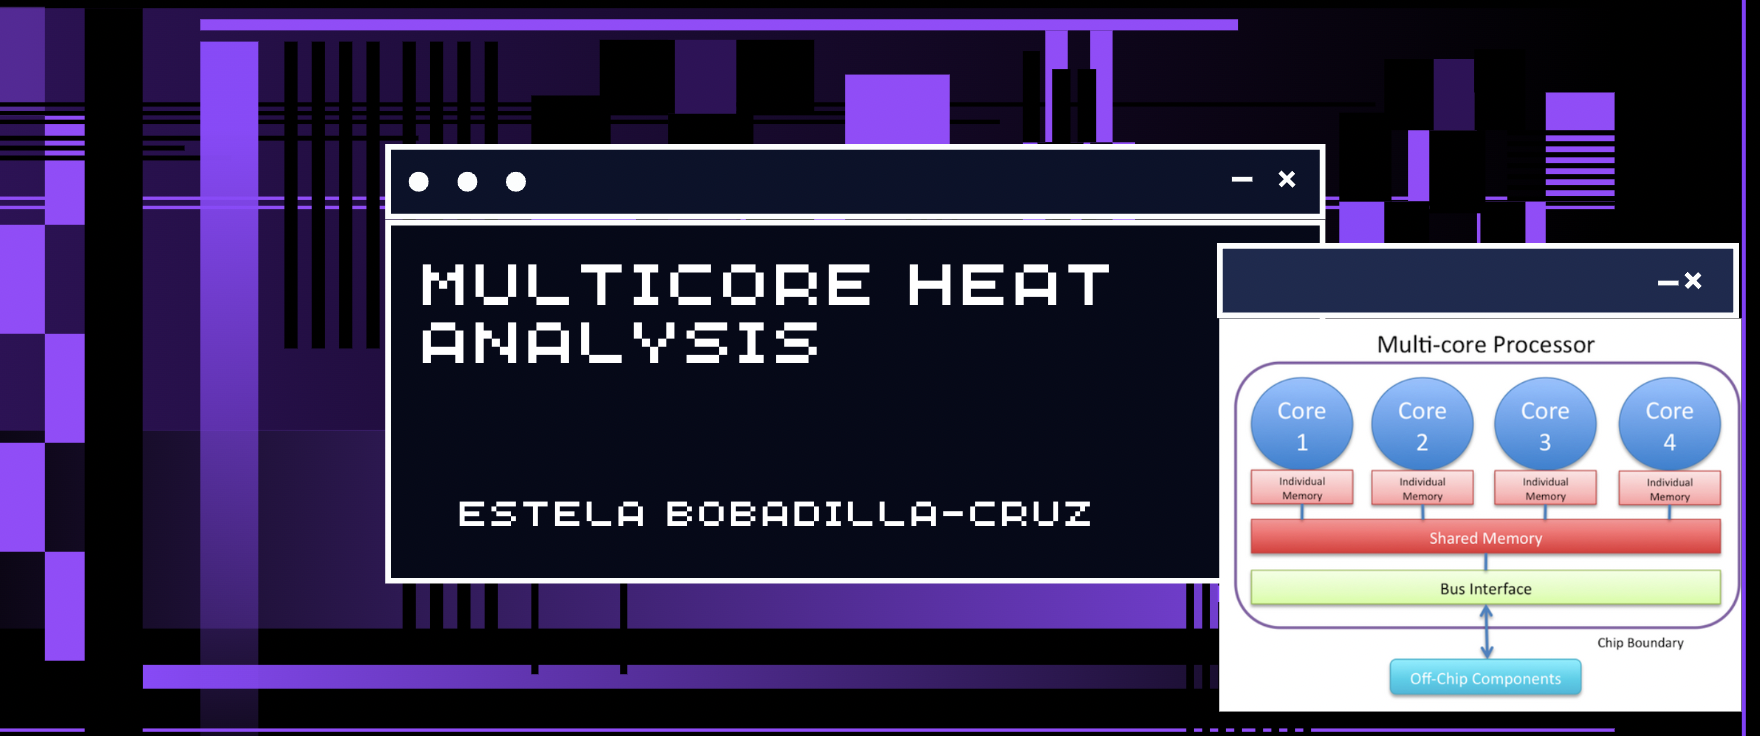

In [ ]:
# import packages and libaries
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Preprocessing Notes:
# Time was measured with omp_get_wtime();
# Compiled with: gcc -Wall -std=c99 -fopenmp -o heatdist heatdist.c -lm -O3
# O3 flag for optimization, command tells compiler to optimize whenever it can


Below, we will analyze both sequential and parallel time as well as measure speedup. Speedup refers to the improvement in the performance of a parallel program or application when it is executed on a parallel computing system, as compared to running the same program on a single processor (i.e., a serial or sequential execution).


---


Measuring Speedup:

* Fix the array dimension to 1000. We will increase the array size to see if the speedup if affected by size.
*  The number of iterations varies as: 10, 20, 30, 40, and 50. We will increase the array size to see if the speedup if affected by number of iterations.

*    For each one calculate the speedup of **four threads** version relative to sequential

* Speedup = sequential time / parallel time



Text(0.5, 0.98, 'Sequential Time by Number of Iterations')

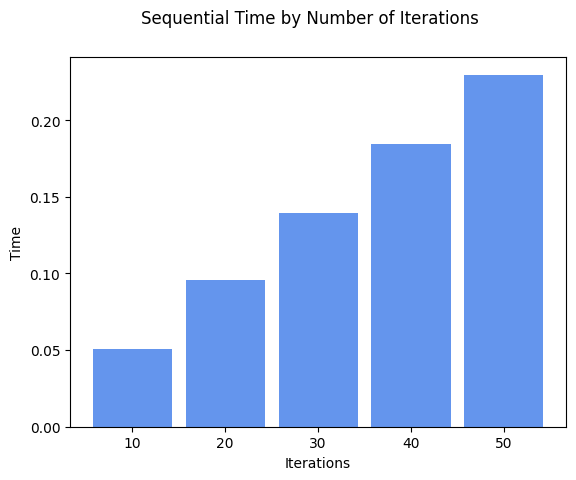

In [ ]:
# 10, 20,30,40, 50 iterations
numIterations = [10,20,30,40,50]

#seqTime is an array with the sequential times
seqTime = [0.050390,  0.095539,  0.139183, 0.184486, 0.229619]

#Bar Plot Visualizing Sequential Time

plt.bar(numIterations, seqTime, width = 8.5, color = ['cornflowerblue'])
plt.xlabel('Iterations')
plt.ylabel('Time')
plt.suptitle("Sequential Time by Number of Iterations")


Text(0.5, 0.98, 'Parallel Time by Number of Iterations')

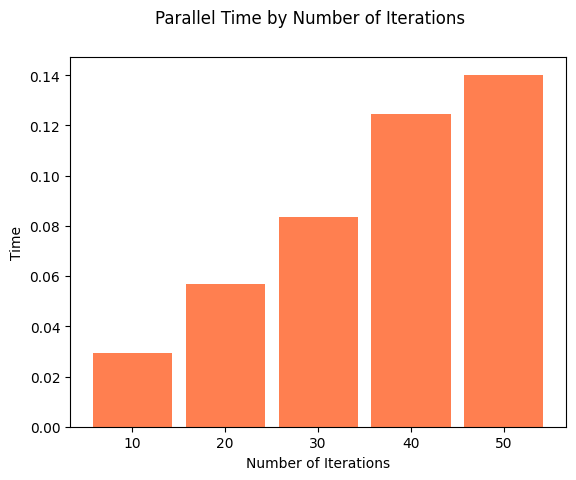

In [ ]:
#parallelTime is an array with parallel times
parallelTime = [0.029286, 0.056889, 0.083478,  0.124456,  0.140213]

plt.bar(numIterations, parallelTime, width = 8.5, color = ['coral'])
plt.xlabel('Number of Iterations')
plt.ylabel('Time')
plt.suptitle("Parallel Time by Number of Iterations")

<ipython-input-5-2162ab11e4cd>:45: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # no overlap


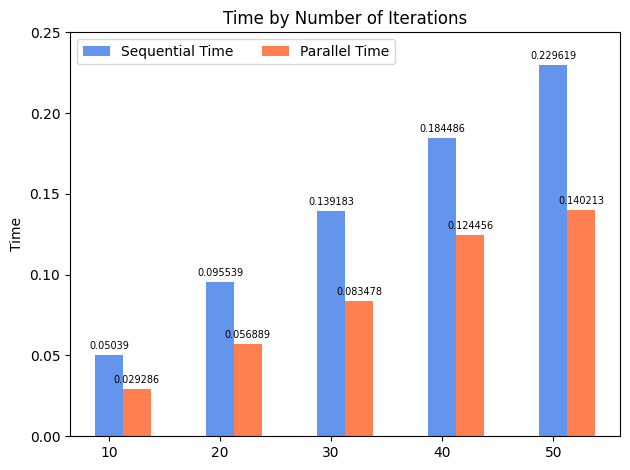

In [ ]:
#Side by Side Comparison
#Bar Plot Visualization to Analyze Sequential Time vs. Parallel Time

# 10, 20,30,40, 50 iterations
numIterations = [10,20,30,40,50]

#times is a dict containing the sequential + parallel time of each iteration
times = {
    'Sequential Time': (0.050390,  0.095539,  0.139183, 0.184486, 0.229619),
    'Parallel Time': (0.029286, 0.056889, 0.083478,  0.124456,  0.140213),
}

#used to determine the horizontal positions of the bars in the bar chart.
x = np.arange(len(numIterations))
#width of each individual bar in the bar chart / ensure consistent spacing
barwidth = 0.25
#acts as an offset multiplier to position the bars side by side. starts with an initial value of 0 and is incremented each time a new bar is plotted
mux = 0
colors = ['cornflowerblue', 'coral']
# figure object, axes objects
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in times.items():
    #determine the horizontal displacement of the bars for each attribute
    offset = barwidth * mux
    #reate the bars in the bar chart;
    #x + offset determines the horizontal position of the bars for the given attribute, placing them side by side.
    #measurement represents the height of the bars, i.e., the time measurements for different numbers of iterations.

    rects = ax.bar(x + offset, measurement, barwidth, label=attribute, color=colors[mux])
    #add labels to the bars
    ax.bar_label(rects, label_type='edge', padding=3, fontsize=7)

    #end of iteration, increment mux by 1, ensuring that the next set bar will be placed adjacent to the previous one
    mux += 1


#graph labels
ax.set_ylabel('Time')
ax.set_title('Time by Number of Iterations')
ax.set_xticks(x)
ax.set_xticklabels(numIterations)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 0.25)  # Adjust the y-axis limit to fit the data

plt.tight_layout() # no overlap
plt.show()


**Further Exploration & Takeaways**


---


1.   Speedup increases when array size increases. Thus, Speedup is affected more with a bigger array size. A larger problem size can often lead to better speedup because it provides more opportunities for parallelism. Parallel algorithms are typically most effective when applied to larger datasets because they can fully use available processing power.

2. Speedup decreases as the number of iterations increases. Increasing the number of iterations may decrease speedup because cores can experience overhead due to thread synchronization and communication, especially because increasing iterations means there is more work to be distributed.

**Overall Takeaway**


---


The parallel execution consistently takes less time than the sequential execution across all iterations, leading to a noticeable 1.5-2x speedup. This means that as the workload grows, our program becomes even more efficient. In practical terms, this translates to reduced processing times, enabling users to complete their tasks faster and more effectively. So, with this program, you can confidently handle larger workloads, knowing that it will run faster and deliver improved performance with increasing job size.

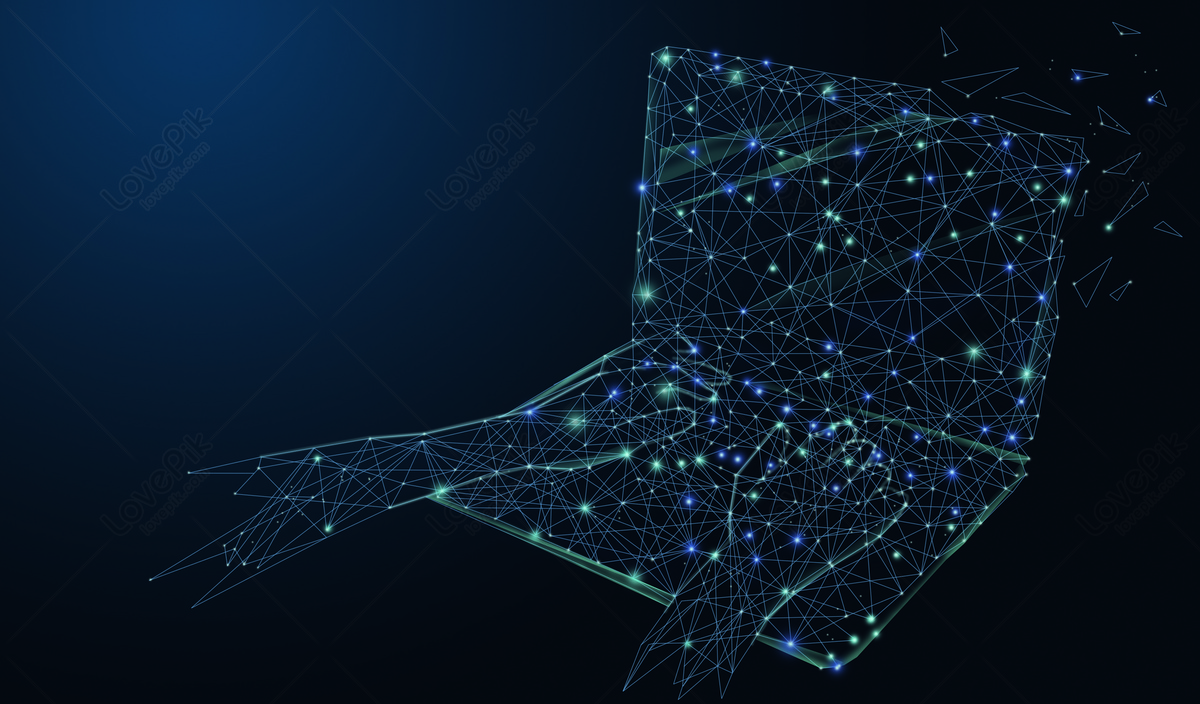